In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
#loding data
columns = ['Age', 'Year', 'Nodes', 'Survival']
df = pd.read_csv("./haberman/haberman.data", names=columns)

In [3]:
df.head() #show first couple samples

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.describe() #show basic statistical information

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


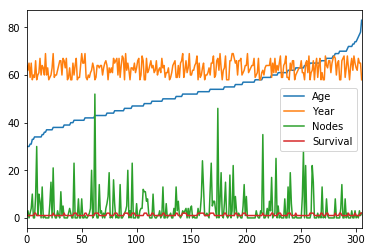

In [5]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69c66adbd0>,
      dtype=object)

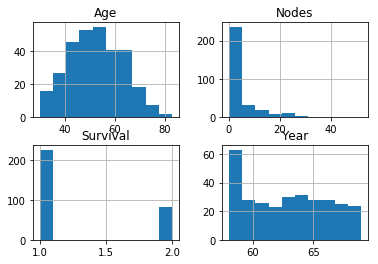

In [6]:
df.hist() # show histogram of all columns(features)

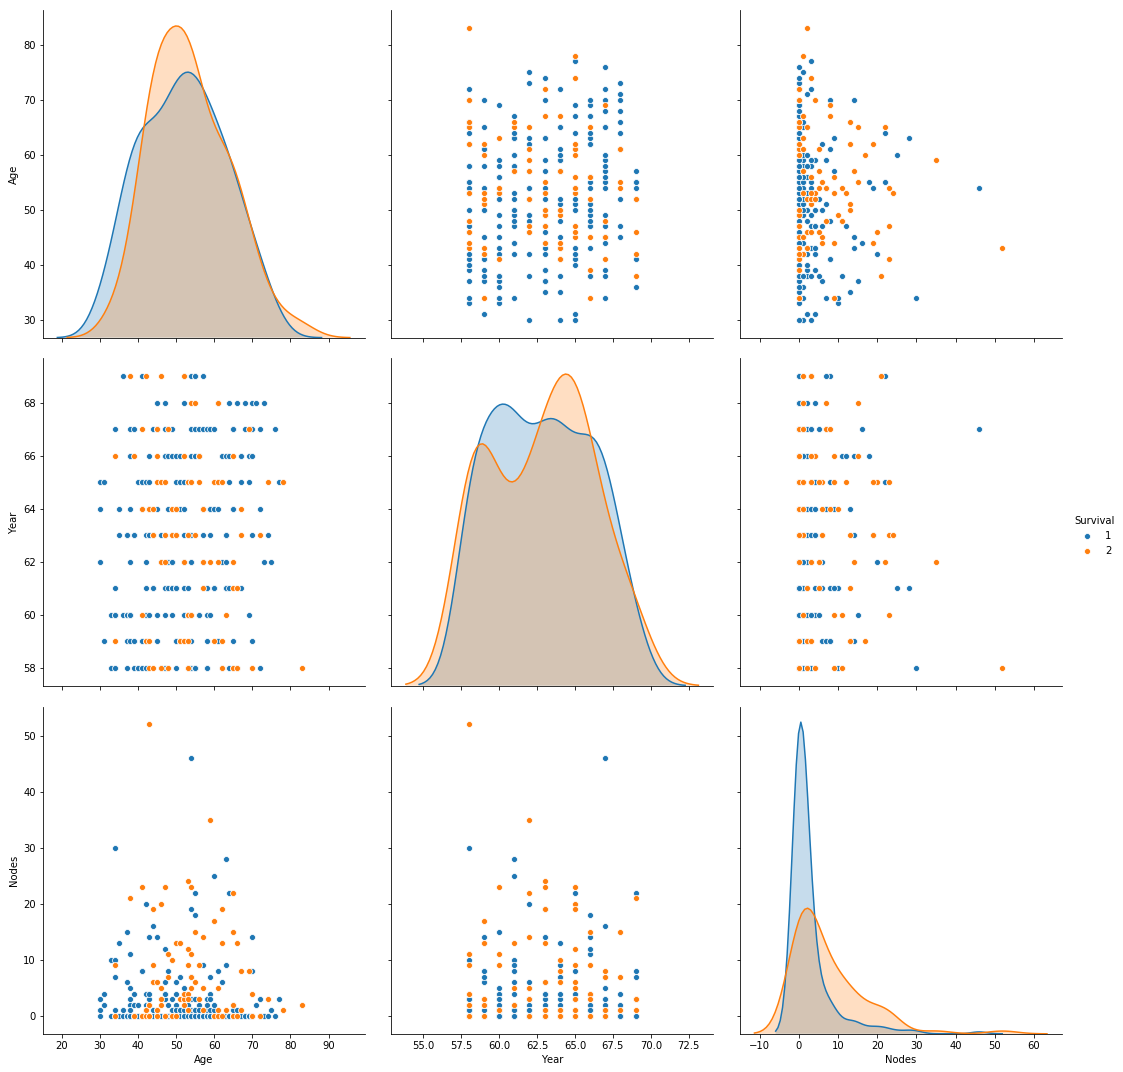

In [7]:
sbn.pairplot(vars=["Age","Year","Nodes"], hue="Survival", data=df,height=5)

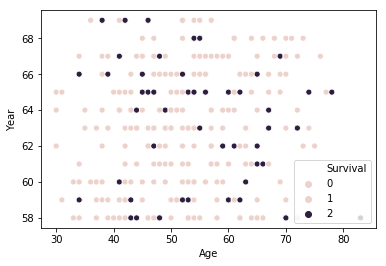

In [8]:
sbn.scatterplot(df[columns[0]],df[columns[1]], hue=df[columns[-1]],hue_norm=(1,2))

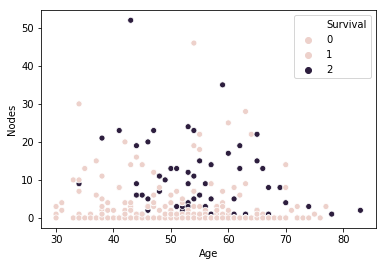

In [9]:
sbn.scatterplot(df[columns[0]],df[columns[2]], hue=df[columns[-1]])

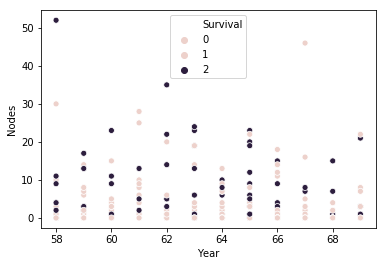

In [10]:
sbn.scatterplot(df[columns[1]],df[columns[2]], hue=df[columns[-1]])

In [11]:
def normalize(s): # normalize data by the given formula
    return (s - s.min()) / (s.max() - s.min()) * (-1) + 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f699c377fd0>,
      dtype=object)

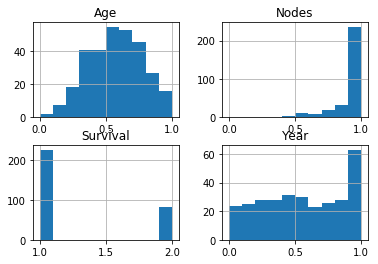

In [12]:
for c in columns[:-1]:
    df[c] = normalize(df[c])

df.hist() # check if the normalization works


In [13]:
X = df[["Age", "Nodes"]]#vector of chosen features
y = df[columns[-1]]     #and the correct class

In [14]:
#spliting data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [15]:
nn = MLPClassifier(
        hidden_layer_sizes=(10,10), activation="logistic",learning_rate_init=0.3, max_iter=1000,
        verbose=True,tol=1e-5, random_state=42)

In [16]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.69725180
Iteration 2, loss = 0.61093315
Iteration 3, loss = 0.62796543
Iteration 4, loss = 0.59959341
Iteration 5, loss = 0.56922532
Iteration 6, loss = 0.57851771
Iteration 7, loss = 0.57212597
Iteration 8, loss = 0.56383830
Iteration 9, loss = 0.60872756
Iteration 10, loss = 0.62907477
Iteration 11, loss = 0.57785879
Iteration 12, loss = 0.57358354
Iteration 13, loss = 0.60116344
Iteration 14, loss = 0.58839320
Iteration 15, loss = 0.56909692
Iteration 16, loss = 0.56569036
Iteration 17, loss = 0.56542442
Iteration 18, loss = 0.56620044
Iteration 19, loss = 0.56979398
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.3, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [17]:
y_pred = nn.predict(X_test)
print(nn.score(X_test, y_test), nn.score(X_train,y_train))
confusion_matrix(y_test, nn.predict(X_test))

(0.717391304347826, 0.7429906542056075)


array([[66,  0],
       [26,  0]])

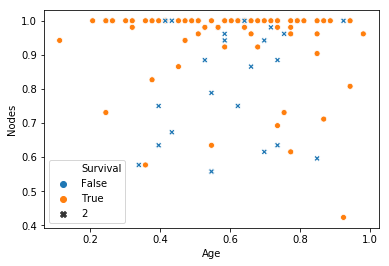

In [18]:
# show scatter plot of testing data 
# color indicates corect classification
# style of mark indicates corect classification 
sbn.scatterplot(X_test["Age"], X_test["Nodes"], style=y_test,  hue=(y_pred == y_test), )

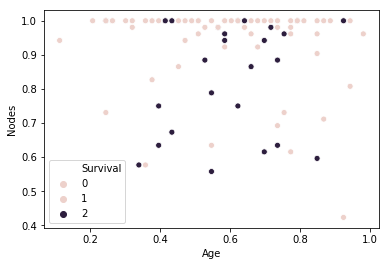

In [19]:
#data = [train_test_split(X, y, test_size=0.3, shuffle=True, random_state=i) for i in range(10)]
sbn.scatterplot(X_test["Age"], X_test["Nodes"],hue=y_test)

In [20]:
#1 layer

import numpy as np
a1 = np.zeros((10,))
from sklearn.metrics import confusion_matrix
for l1 in range(10):
            size = (l1*30+10, ) # neurons in hidden layers
            nn = MLPClassifier(
                hidden_layer_sizes=size, activation="logistic",learning_rate_init=0.05, max_iter=10000,
                verbose=False,tol=1e-7, random_state=42)
            scores = []
            #for (X_train, X_test, y_train, y_test) in data:
            nn.fit(X_train, y_train)
            scores.append(confusion_matrix(y_test,nn.predict(X_test)))
            a1[l1] = nn.score(X_test, y_test)
            print(size, a1[l1])

print(a1)


((10,), 0.717391304347826)
((40,), 0.717391304347826)
((70,), 0.717391304347826)
((100,), 0.717391304347826)
((130,), 0.717391304347826)
((160,), 0.717391304347826)
((190,), 0.717391304347826)
((220,), 0.7282608695652174)
((250,), 0.7282608695652174)
((280,), 0.717391304347826)
[0.7173913  0.7173913  0.7173913  0.7173913  0.7173913  0.7173913
 0.7173913  0.72826087 0.72826087 0.7173913 ]


In [21]:
#2 layers
import numpy as np
a2 = np.zeros((10,10))
from sklearn.metrics import confusion_matrix
for l1 in range(10):
    for l2 in range(10):
            size = (l1*30+10, l2*30+10, ) # neurons in hidden layers
            nn = MLPClassifier(
                    hidden_layer_sizes=size, activation="logistic",learning_rate_init=0.05, max_iter=1000,
                    verbose=False,tol=1e-7, random_state=42)
            scores = []
            #for (X_train, X_test, y_train, y_test) in data:
            nn.fit(X_train, y_train)
            scores.append(confusion_matrix(y_test,nn.predict(X_test)))
            a2[l1][l2] = nn.score(X_test, y_test)
            print(size, a2[l1][l2])

print(a2)

((10, 10), 0.717391304347826)
((10, 40), 0.717391304347826)
((10, 70), 0.717391304347826)
((10, 100), 0.717391304347826)
((10, 130), 0.717391304347826)
((10, 160), 0.717391304347826)
((10, 190), 0.717391304347826)
((10, 220), 0.717391304347826)
((10, 250), 0.717391304347826)
((10, 280), 0.717391304347826)
((40, 10), 0.717391304347826)
((40, 40), 0.717391304347826)
((40, 70), 0.7282608695652174)
((40, 100), 0.717391304347826)
((40, 130), 0.717391304347826)
((40, 160), 0.7282608695652174)
((40, 190), 0.717391304347826)
((40, 220), 0.717391304347826)
((40, 250), 0.717391304347826)
((40, 280), 0.717391304347826)
((70, 10), 0.717391304347826)
((70, 40), 0.717391304347826)
((70, 70), 0.717391304347826)
((70, 100), 0.717391304347826)
((70, 130), 0.717391304347826)
((70, 160), 0.717391304347826)
((70, 190), 0.717391304347826)
((70, 220), 0.717391304347826)
((70, 250), 0.717391304347826)
((70, 280), 0.717391304347826)
((100, 10), 0.717391304347826)
((100, 40), 0.717391304347826)
((100, 70), 0.7

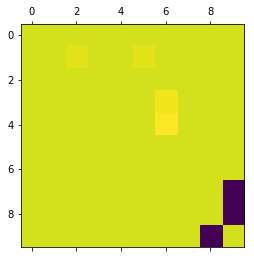

In [22]:
#color image of results 2hidden layer
#row index - 1st layer
#column index - 2nd layer
#map function of index to number of neurons in hiddne layer
# #neurons(index) = 10+30*index
import matplotlib.pyplot as plt
ax =plt.matshow(a2)


In [23]:
#3 layers it take same time ~20min
import numpy as np
a3 = np.zeros((10,10,10))

for l1 in range(10):
    for l2 in range(10):
        for l3 in range(10):
            size = (l1*30+10, l2*30+10, l3*30+10) # neurons in hidden layers
            nn = MLPClassifier(
                    hidden_layer_sizes=size, activation="logistic",learning_rate_init=0.05, max_iter=10000,
                    verbose=False,tol=1e-7, random_state=42)
            scores = []
            #for (X_train, X_test, y_train, y_test) in data:
            nn.fit(X_train, y_train)
            scores.append(confusion_matrix(y_test,nn.predict(X_test)))
            a3[l1][l2][l3] = nn.score(X_test, y_test)
            print(size)

print(a3)

(10, 10, 10)
(10, 10, 40)
(10, 10, 70)
(10, 10, 100)
(10, 10, 130)
(10, 10, 160)
(10, 10, 190)
(10, 10, 220)
(10, 10, 250)
(10, 10, 280)
(10, 40, 10)
(10, 40, 40)
(10, 40, 70)
(10, 40, 100)
(10, 40, 130)
(10, 40, 160)
(10, 40, 190)
(10, 40, 220)
(10, 40, 250)
(10, 40, 280)
(10, 70, 10)
(10, 70, 40)
(10, 70, 70)
(10, 70, 100)
(10, 70, 130)
(10, 70, 160)
(10, 70, 190)
(10, 70, 220)
(10, 70, 250)
(10, 70, 280)
(10, 100, 10)
(10, 100, 40)
(10, 100, 70)
(10, 100, 100)
(10, 100, 130)
(10, 100, 160)
(10, 100, 190)
(10, 100, 220)
(10, 100, 250)
(10, 100, 280)
(10, 130, 10)
(10, 130, 40)
(10, 130, 70)
(10, 130, 100)
(10, 130, 130)
(10, 130, 160)
(10, 130, 190)
(10, 130, 220)
(10, 130, 250)
(10, 130, 280)
(10, 160, 10)
(10, 160, 40)
(10, 160, 70)
(10, 160, 100)
(10, 160, 130)
(10, 160, 160)
(10, 160, 190)
(10, 160, 220)
(10, 160, 250)
(10, 160, 280)
(10, 190, 10)
(10, 190, 40)
(10, 190, 70)
(10, 190, 100)
(10, 190, 130)
(10, 190, 160)
(10, 190, 190)
(10, 190, 220)
(10, 190, 250)
(10, 190, 280)
(

(160, 160, 100)
(160, 160, 130)
(160, 160, 160)
(160, 160, 190)
(160, 160, 220)
(160, 160, 250)
(160, 160, 280)
(160, 190, 10)
(160, 190, 40)
(160, 190, 70)
(160, 190, 100)
(160, 190, 130)
(160, 190, 160)
(160, 190, 190)
(160, 190, 220)
(160, 190, 250)
(160, 190, 280)
(160, 220, 10)
(160, 220, 40)
(160, 220, 70)
(160, 220, 100)
(160, 220, 130)
(160, 220, 160)
(160, 220, 190)
(160, 220, 220)
(160, 220, 250)
(160, 220, 280)
(160, 250, 10)
(160, 250, 40)
(160, 250, 70)
(160, 250, 100)
(160, 250, 130)
(160, 250, 160)
(160, 250, 190)
(160, 250, 220)
(160, 250, 250)
(160, 250, 280)
(160, 280, 10)
(160, 280, 40)
(160, 280, 70)
(160, 280, 100)
(160, 280, 130)
(160, 280, 160)
(160, 280, 190)
(160, 280, 220)
(160, 280, 250)
(160, 280, 280)
(190, 10, 10)
(190, 10, 40)
(190, 10, 70)
(190, 10, 100)
(190, 10, 130)
(190, 10, 160)
(190, 10, 190)
(190, 10, 220)
(190, 10, 250)
(190, 10, 280)
(190, 40, 10)
(190, 40, 40)
(190, 40, 70)
(190, 40, 100)
(190, 40, 130)
(190, 40, 160)
(190, 40, 190)
(190, 40, 2

In [24]:
print("best found accuracy")
print("1 hidden layer",a1.max())
print("2 hidden layers", a2.max())
print("3 hidden layers", a3.max())

best found accuracy
('1 hidden layer', 0.7282608695652174)
('2 hidden layers', 0.75)
('3 hidden layers', 0.7282608695652174)


In [25]:
l1 = 4
l2 = 6
size = (130,190)
for i in range(1,10):
    test_size = i/10.0
    #spliting data into training and testing parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)
    
    nn =  MLPClassifier(
                        hidden_layer_sizes=size, activation="logistic",learning_rate_init=0.05, max_iter=10000,
                    verbose=False,tol=1e-7, random_state=42)
    scores = []
    #for (X_train, X_test, y_train, y_test) in data:
    nn.fit(X_train, y_train)

    y_pred = nn.predict(X_test)
    print(test_size)
    print(nn.score(X_test, y_test), nn.score(X_train,y_train))
    print(confusion_matrix(y_test, nn.predict(X_test)))
    
    

0.1
(0.6451612903225806, 0.7672727272727272)
[[20  2]
 [ 9  0]]
0.2
(0.7096774193548387, 0.7418032786885246)
[[44  0]
 [18  0]]
0.3
(0.75, 0.7663551401869159)
[[60  6]
 [17  9]]
0.4
(0.2682926829268293, 0.26229508196721313)
[[ 0 90]
 [ 0 33]]
0.5
(0.7647058823529411, 0.7058823529411765)
[[117   0]
 [ 36   0]]
0.6
(0.7391304347826086, 0.7295081967213115)
[[136   0]
 [ 48   0]]
0.7
(0.7441860465116279, 0.7142857142857143)
[[160   0]
 [ 55   0]]
0.8
(0.2653061224489796, 0.26229508196721313)
[[  0 180]
 [  0  65]]
0.9
(0.7282608695652174, 0.8)
[[201   0]
 [ 75   0]]


0.3
(0.75, 0.7663551401869159)
[[60  6]
 [17  9]]


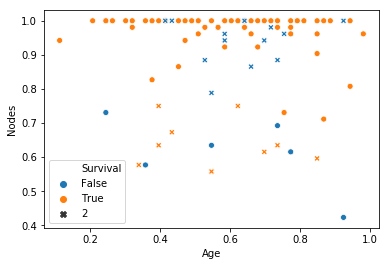

In [26]:
# show best ressult 

test_size = 0.3
#spliting data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)

nn =  MLPClassifier(
                    hidden_layer_sizes=size, activation="logistic",learning_rate_init=0.05, max_iter=10000,
                    verbose=False,tol=1e-7, random_state=42)
scores = []
#for (X_train, X_test, y_train, y_test) in data:
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
print(test_size)
print(nn.score(X_test, y_test), nn.score(X_train,y_train))
print(confusion_matrix(y_test, nn.predict(X_test)))


# show scatter plot of testing data 
# color indicates corect classification
# style of mark indicates corect classification 
ax = sbn.scatterplot(X_test["Age"], X_test["Nodes"], style=y_test,  hue=(y_pred == y_test), )
